In [152]:
import re
import pandas as pd
import numpy as np
import emoji
from emoji import EMOJI_DATA
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [153]:
# Extract the Date time
def date_time(s):
    pattern=r'^(\d{2}/\d{2}/\d{2}), (\d{2}:\d{2})\s?(am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message

In [154]:
data=[]
conversation='Conversation.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [155]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\srite\AppData\Local\Temp\ipykernel_32916\1528190754.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


,Date,Time,contact,Message,positive,negative,neutral
0,2024-02-25,10:53 am,Sri Teja,What is the status update on our project?,0.000,0.0,1.000
1,2024-02-25,10:54 am,Sri Charan Rayala,Our team still working on the project and is r...,0.000,0.0,1.000
2,2024-02-25,10:54 am,Sri Teja,What?,0.000,0.0,1.000
3,2024-02-25,10:55 am,Sri Teja,We are supposed to deliver the product in two ...,0.000,0.0,1.000
4,2024-02-25,10:55 am,Sri Teja,"As the team lead, it’s your responsibility to ...",0.103,0.0,0.897


In [156]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [157]:
df.contact.unique()

array(['Sri Teja', 'Sri Charan Rayala'], dtype=object)

In [158]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [159]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

In [160]:
import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2024-02-25,10:53 am,Sri Teja,What is the status update on our project?,[]
1,2024-02-25,10:54 am,Sri Charan Rayala,Our team still working on the project and is r...,[]
2,2024-02-25,10:54 am,Sri Teja,What?,[]
3,2024-02-25,10:55 am,Sri Teja,We are supposed to deliver the product in two ...,[]
4,2024-02-25,10:55 am,Sri Teja,"As the team lead, it’s your responsibility to ...",[]
5,2024-02-25,10:56 am,Sri Charan Rayala,There have been slight setbacks during the sta...,[]
6,2024-02-25,10:57 am,Sri Charan Rayala,I am extremely sorry for the delay,[]
7,2024-02-25,10:57 am,Sri Teja,Any delay in the delivery schedule will reflec...,[😠]
8,2024-02-25,10:58 am,Sri Teja,Our company will not accept this incompetence,[]
9,2024-02-25,10:58 am,Sri Charan Rayala,Me and my team are extremely sorry and will ma...,[]


In [161]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😡', 2)
('😠', 1)
('😔', 1)


There are 1148 words in all the messages.


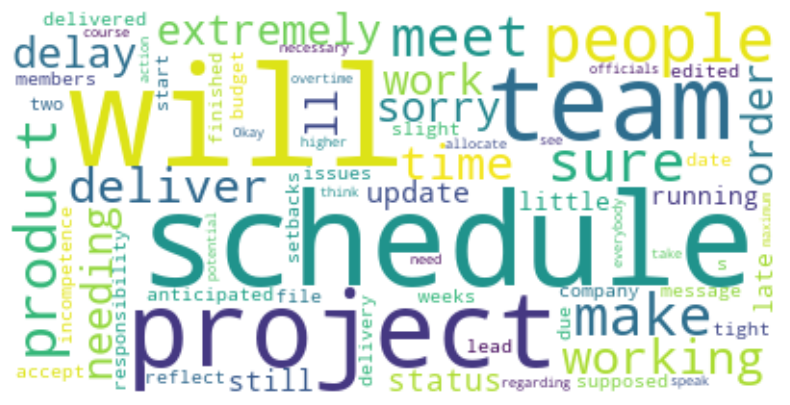

In [162]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()